# Comparing the Compartmental Model SSA With SIR Euler

In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
s = 100
inf = 2
xinit = np.array([s, inf ,0])



In [102]:
from tqdm import tqdm
N = 5000
b = 2
gamma = 1/3
dt = 1/(b*(s+inf)+gamma*(s+inf))
print(dt)


0.004201680672268907


In [103]:
trials =10
all_states = list()

for _ in tqdm(range(trials)):
    states = np.zeros((N, 3))
    states[0, :] = xinit

    # wh have three possibilities
    for i in range(1,N):
        rate_inf = b*states[i-1, 0]*states[i-1, 1]/(inf+s)
        rate_recover = gamma*states[i-1,1]#/np.sum(states)
        prob_none = 1 - (rate_inf + rate_recover)*dt
        # print(prob_none)
        inf_inc = np.array((-1, 1, 0))
        rec_inc = np.array((0, -1, 1))
        none_inc = np.array((0, 0, 0))
        incs = [inf_inc, rec_inc, none_inc]
        # print([rate_inf*dt, rate_recover*dt, prob_none])
        irnd = np.random.choice((0, 1, 2), p = [rate_inf*dt, rate_recover*dt, prob_none])
        # print(irnd)
        states[i] = states[i-1] + incs[irnd]
    all_states.append(states)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 20.28it/s]


In [104]:
# Implement Euler Method


dt_new = dt
# print(euler_states[0])
steps = int(N*dt/dt_new) +1
dt = dt_new
euler_states = np.zeros((steps,3))
euler_states[0, :] = xinit/(s+inf)
# steps = 5
gamma_sir = gamma#/(s+inf)
b_sir = b
for i in range(1,steps):
    euler_states[i,0] = euler_states[i-1,0] - (b_sir*euler_states[i-1,0]*euler_states[i-1,1])*dt
    euler_states[i,1] = euler_states[i-1,1] + (b_sir*euler_states[i-1,0]*euler_states[i-1,1] -gamma_sir*euler_states[i-1,1])*dt
    euler_states[i,2] = euler_states[i-1,2] + gamma_sir*euler_states[i-1,1]*dt
    if euler_states[i,0]<=0:
        euler_states[i,0] = 0
    if euler_states[i,1]<=0:
        euler_states[i,1] = 0
    if euler_states[i,2]<=0:
        euler_states[i,2] = 0

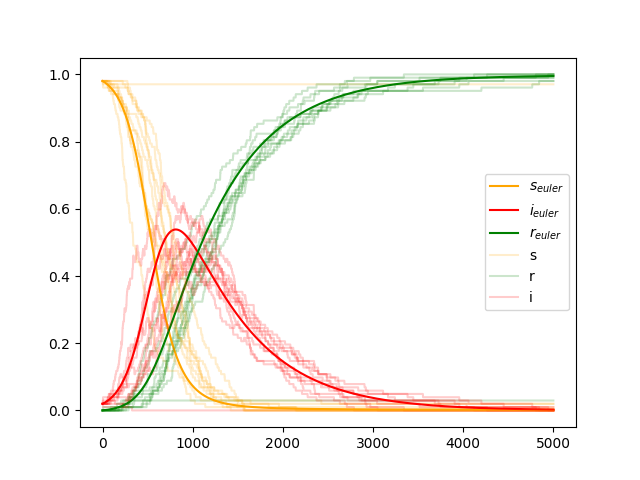

In [105]:
%matplotlib widget
plt.clf()
for states in all_states[:-1]:
    plt.plot((states/(s+inf))[:,0], alpha = 0.2, color = 'orange')
    plt.plot((states/(s+inf))[:,2], alpha = 0.2, color = 'green')
    plt.plot((states/(s+inf))[:,1], alpha = 0.2, color = 'red')

plt.plot(euler_states[:,0], label = r'$s_{euler}$', color = 'orange')
plt.plot(euler_states[:,1], label = r'$i_{euler}$', color = 'red')
plt.plot(euler_states[:,2], label = r'$r_{euler}$', color = 'green')

plt.plot((all_states[-1]/(s+inf))[:,0], alpha = 0.2, label = 's', color = 'orange')
plt.plot((all_states[-1]/(s+inf))[:,2], alpha = 0.2, label = 'r', color = 'green')
plt.plot((all_states[-1]/(s+inf))[:,1], alpha = 0.2, label = 'i', color = 'red')
plt.legend()
plt.show()